In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [2]:
data = pd.read_csv('data3a.csv')

In [3]:
data['f_int'] = (data.f=='T').astype(int)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
y        100 non-null int64
x        100 non-null float64
f        100 non-null object
f_int    100 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.2+ KB


In [9]:
llh = np.sum(stats.poisson.logpmf(data.y,data.y))
k = 100
deviance = -2*llh
residual_deviance = 0.
aic = -2 * (llh - k)
summary = [['full model',k,llh,deviance,residual_deviance,aic]]

In [10]:
data.x_c = sm.add_constant(data.x)

In [11]:
model1 = sm.GLM(data.y,data.x_c['const'],family=sm.families.Poisson())
result_1 = model1.fit()
summary.append(['const',result_1.df_model+1,result_1.llf,-2*result_1.llf,result_1.deviance,result_1.aic])

In [12]:
model2 = sm.GLM(data.y,data.x_c,family=sm.families.Poisson())
result_2 = model2.fit()
summary.append(['x',result_2.df_model+1,result_2.llf,-2*result_2.llf,result_2.deviance,result_2.aic])

In [13]:
summary_frame = pd.DataFrame(summary,columns=['model','k','logL','deviance','resudual deviance','AIC'])

In [14]:
summary_frame

,model,k,logL,deviance,resudual deviance,AIC
0,full model,100,-192.889753,385.779505,0.000000,585.779505
1,const,1,-237.643221,475.286443,89.506938,477.286443
2,x,2,-235.386251,470.772502,84.992996,474.772502


In [18]:
result_1.params[0]

2.057962510002711

In [39]:
np.random.seed(10)
data['y_rand'] = np.random.poisson(data.y.mean(),100)
result_1 = sm.GLM(data.y_rand,data.x_c['const'],family=sm.families.Poisson()).fit()
result_2 = sm.GLM(data.y_rand,data.x_c,family=sm.families.Poisson()).fit()
deltaD = -2 * (result_1.llf - result_2.llf)
print deltaD

2.70683378851


In [40]:
def get_dd(data):
    data['y_rand'] = np.random.poisson(data.y.mean(),100)
    result = sm.GLM(data.y_rand,data.x_c,family=sm.families.Poisson()).fit()
    return result.null_deviance - result.deviance

def pb(data,n_bootstrap):
    return np.array([get_dd(data) for i in range(n_bootstrap)])

dd12 = pb(data,10000)

In [41]:
dd12= pd.Series(dd12)
dd12.describe()

count    1.000000e+04
mean     9.899338e-01
std      1.391963e+00
min      8.017381e-09
25%      1.054329e-01
50%      4.667647e-01
75%      1.314633e+00
max      1.935826e+01
dtype: float64

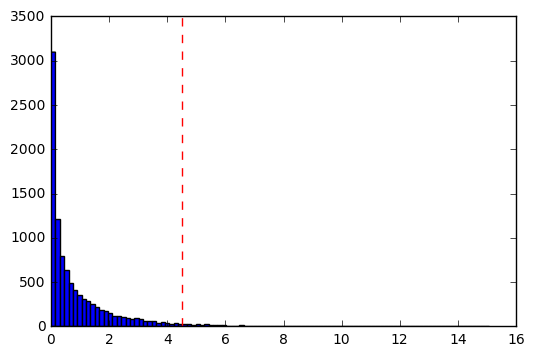

In [32]:
plt.hist(dd12,bins=100)
plt.axvline(x=4.5,ls='--',c='r')
plt.show()

In [37]:
np.sum((dd12)> 0.05)

8125

In [42]:
dd12.quantile(0.95)

3.8103364321474635

In [ ]:
P = stats.chi2.sf(x=4.5,df=)